# Decision Tree Classifier

## Importações

In [208]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(777)

## Funções Principais

In [209]:
def prepare_train(path: str, selector) -> list:
    df_train = pd.read_csv(path)
    X_train = df_train.loc[:, df_train.columns != 'Target']
    y_train = df_train['Target']

    X_train = selector.fit_transform(X_train, y_train)
    return X_train, y_train


def prepare_test(path: str, selector) -> list:
    df_test = pd.read_csv(path)
    X_test = df_test.loc[:, df_test.columns != 'Target']
    y_test = df_test['Target']

    X_test = selector.transform(X_test)
    return X_test, y_test


def get_best_clf(param_grid, X_train, y_train):
    clf = DecisionTreeClassifier()

    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

    scorer = make_scorer(f1_score, pos_label='Dropout')

    cv_scores = cross_val_score(best_clf, X_train, y_train, cv=skf, scoring=scorer)

    print(f'Scores de F1 para cada fold: {cv_scores}')
    print(f'Média do F1-score: {cv_scores.mean()}')
    print(f'Desvio padrão do F1-score: {cv_scores.std()}')

    best_clf.fit(X_train, y_train)

    return best_clf


def print_clf_score(best_clf, X_test, y_test):
    y_pred = best_clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=['Dropout', 'Graduate_or_Enrolled'])
    labels = ['Dropout', 'Graduate_or_Enrolled']

    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix Heatmap')
    plt.xticks(np.arange(len(labels)) + 0.5, labels)
    plt.yticks(np.arange(len(labels)) + 0.5, labels)
    plt.show()

In [210]:
train_path = '../../data/preprocessed/train-validation/'
test_path = '../../data/preprocessed/test/'

## DTREE

### Desbalanceado

c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  70  72  98 100 119 172 185 187] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Scores de F1 para cada fold: [0.75810474 0.76705882 0.7654321  0.73636364 0.73182957]
Média do F1-score: 0.7517577741495861
Desvio padrão do F1-score: 0.014802066476518999


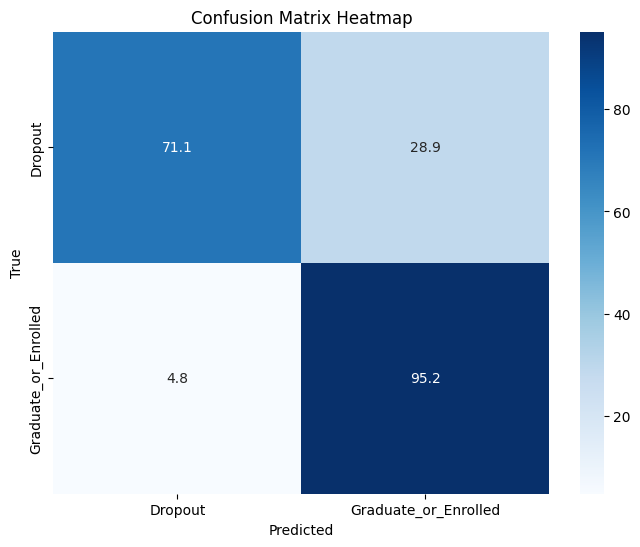

In [211]:
data_config = 'drp_XOHE_scld.csv'

selector = SelectKBest(score_func=f_classif, k='all')

X_train, y_train = prepare_train(train_path+data_config, selector)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_clf = get_best_clf(param_grid, X_train, y_train)

X_test, y_test = prepare_test(test_path+data_config, selector)

print_clf_score(best_clf, X_test, y_test)

### Balanceado

c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  70  72  98 100 119 147 172 185 187] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Scores de F1 para cada fold: [0.87868852 0.88413948 0.89309577 0.87336245 0.86101695]
Média do F1-score: 0.8780606340192796
Desvio padrão do F1-score: 0.0107327729993309


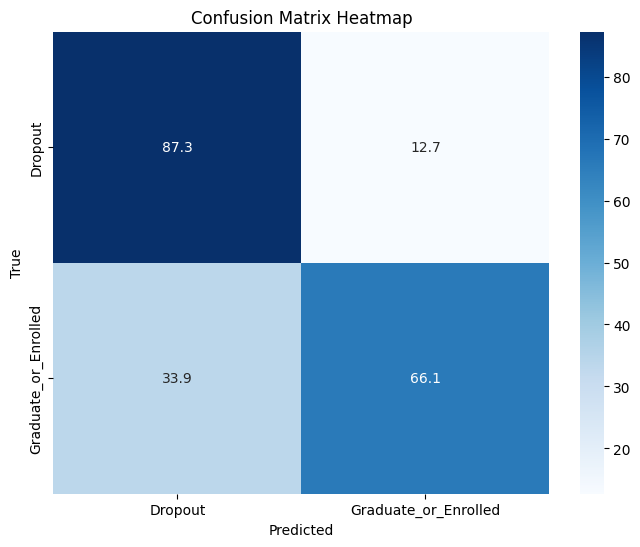

In [213]:
data_config = 'drp_XOHE_scld.csv'

X_train, y_train = prepare_train(train_path+'balanced/'+data_config, selector)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_clf = get_best_clf(param_grid, X_train, y_train)

X_test, y_test = prepare_test(test_path+data_config, selector)

print_clf_score(best_clf, X_test, y_test)